<a href="https://colab.research.google.com/github/lucastbeloni/Sistema-de-Informacoes-sobre-Mortalidade/blob/main/SIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vizualização sobre Sistema de Informações sobre Mortalidade (SIM)**

# Importando bibliotecas

In [1]:
import  pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
#import basedosdados as bd

# Extraindo dados

In [2]:
df = pd.read_csv('./arquivos/municipio_causa_idade_sexo_raca.csv')

In [3]:
df.head()

,ano,sigla_uf,id_municipio,causa_basica,idade,sexo,raca_cor,numero_obitos
0,1996,AC,1200000,R99,NaN,1.0,NaN,1
1,1996,AC,1200000,V892,25.0,1.0,NaN,1
2,1996,AC,1200000,X959,NaN,1.0,3.0,1
3,1996,AC,1200000,X959,NaN,1.0,NaN,1
4,1996,AC,1200013,A419,71.0,2.0,NaN,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22618604 entries, 0 to 22618603
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ano            int64  
 1   sigla_uf       object 
 2   id_municipio   int64  
 3   causa_basica   object 
 4   idade          float64
 5   sexo           float64
 6   raca_cor       float64
 7   numero_obitos  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.3+ GB


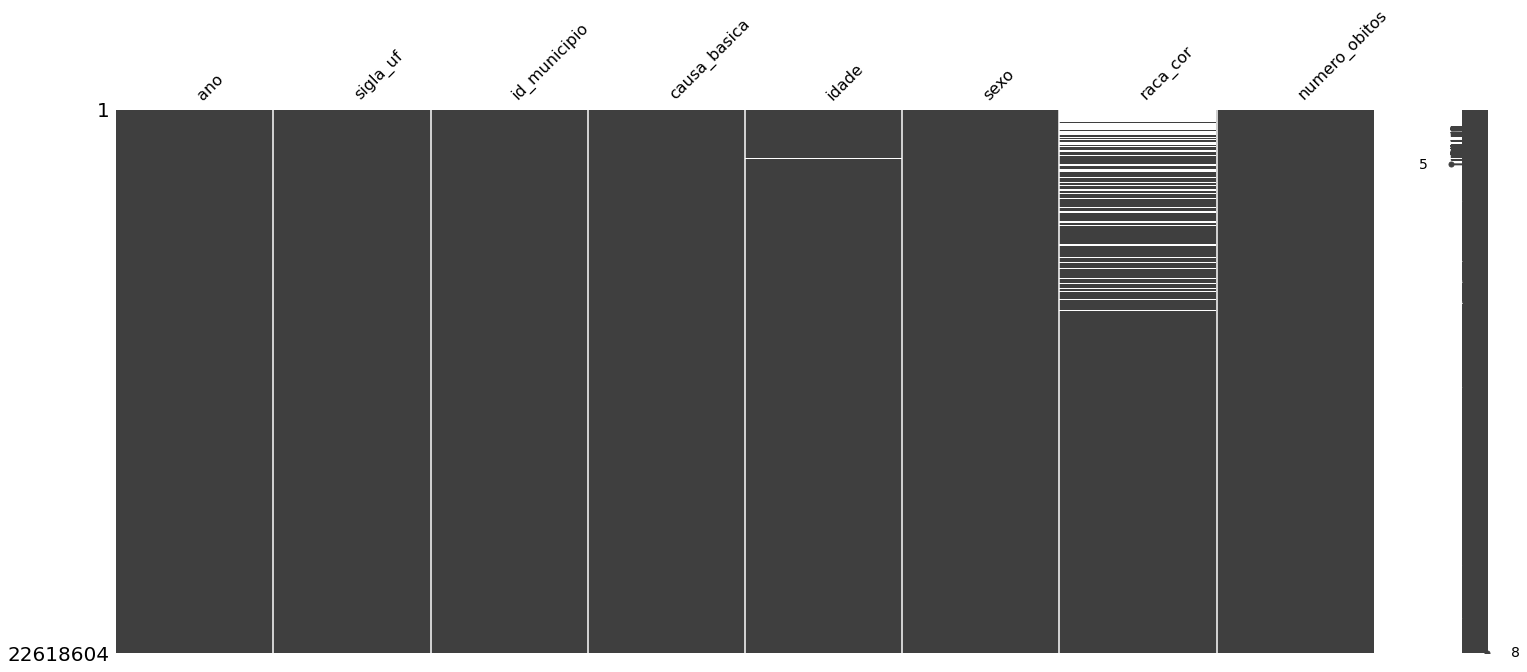

In [5]:
msn.matrix(df)
plt.show()

In [6]:
df.isnull().sum()

ano                    0
sigla_uf               0
id_municipio           0
causa_basica           0
idade             106560
sexo                1443
raca_cor         3037118
numero_obitos          0
dtype: int64

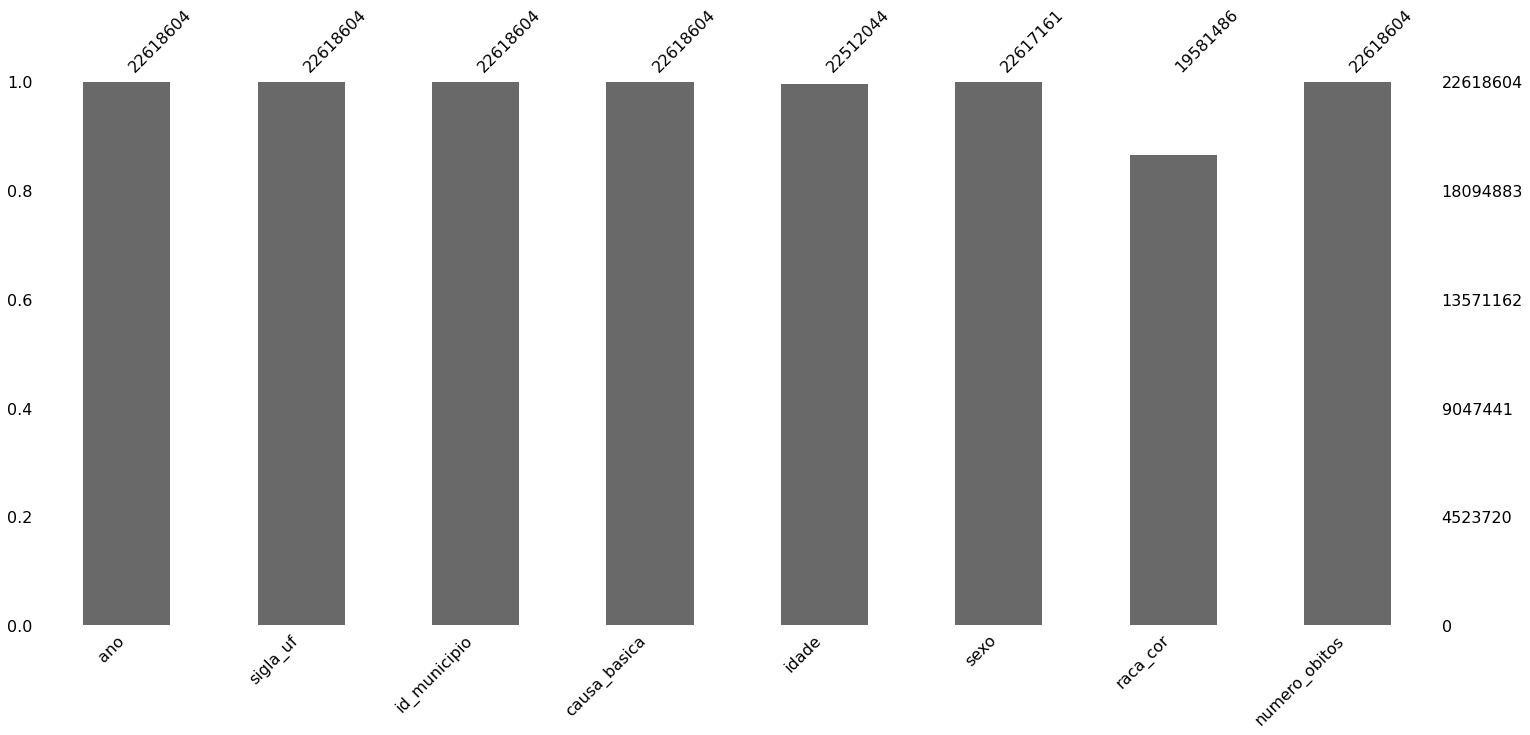

In [7]:
msn.bar(df)

plt.show()

In [8]:
df.isnull().sum()/df.shape[0]

ano              0.000000
sigla_uf         0.000000
id_municipio     0.000000
causa_basica     0.000000
idade            0.004711
sexo             0.000064
raca_cor         0.134275
numero_obitos    0.000000
dtype: float64

# Visualização de dados

## Correlação de dados

In [9]:
df.corr()

,ano,id_municipio,idade,sexo,raca_cor,numero_obitos
ano,1.000000,-0.029306,0.118530,0.014608,0.084371,-0.014569
id_municipio,-0.029306,1.000000,0.043714,0.001934,-0.316910,0.003131
idade,0.118530,0.043714,1.000000,0.148561,-0.142334,0.003572
sexo,0.014608,0.001934,0.148561,1.000000,-0.049866,-0.001566
raca_cor,0.084371,-0.316910,-0.142334,-0.049866,1.000000,-0.026366
numero_obitos,-0.014569,0.003131,0.003572,-0.001566,-0.026366,1.000000


In [10]:
corr=df.corr()

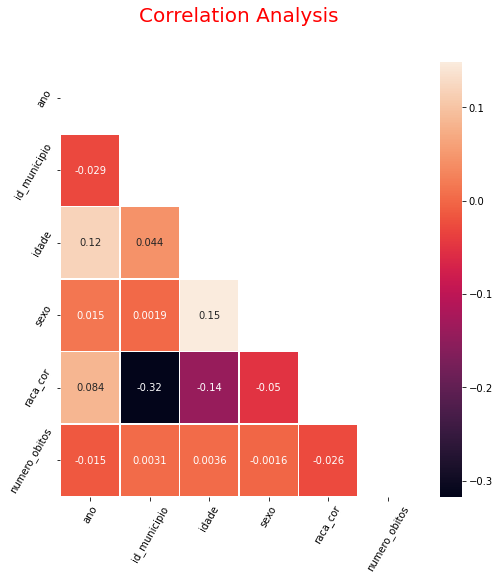

In [11]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

In [12]:
df_copy = df.copy()

In [13]:
df_copy.drop(['id_municipio'], axis=1, inplace=True)

In [14]:
df_copy['sexo'].replace({1.0: 'Masculino', 2.0: 'Feminino'}, inplace=True)

In [15]:
df_copy['raca_cor'].replace({1.0: 'Branca', 2.0: 'Preta', 3.0: 'Amarela', 4.0: 'Parda', 5.0: 'Indigena',}, inplace=True)

In [16]:
df_copy.head()

,ano,sigla_uf,causa_basica,idade,sexo,raca_cor,numero_obitos
0,1996,AC,R99,NaN,Masculino,NaN,1
1,1996,AC,V892,25.0,Masculino,NaN,1
2,1996,AC,X959,NaN,Masculino,Amarela,1
3,1996,AC,X959,NaN,Masculino,NaN,1
4,1996,AC,A419,71.0,Feminino,NaN,1


## Óbitos ao longo dos anos

In [17]:
mortes_por_ano = df_copy.groupby('ano').numero_obitos.sum().reset_index()

In [18]:
mortes_por_ano.sort_values('ano', ascending=False)

,ano,numero_obitos
23,2019,1347263
22,2018,1313887
21,2017,1309729
20,2016,1306311
19,2015,1260774
18,2014,1223152
17,2013,1206476
16,2012,1177145
15,2011,1166351
14,2010,1132888


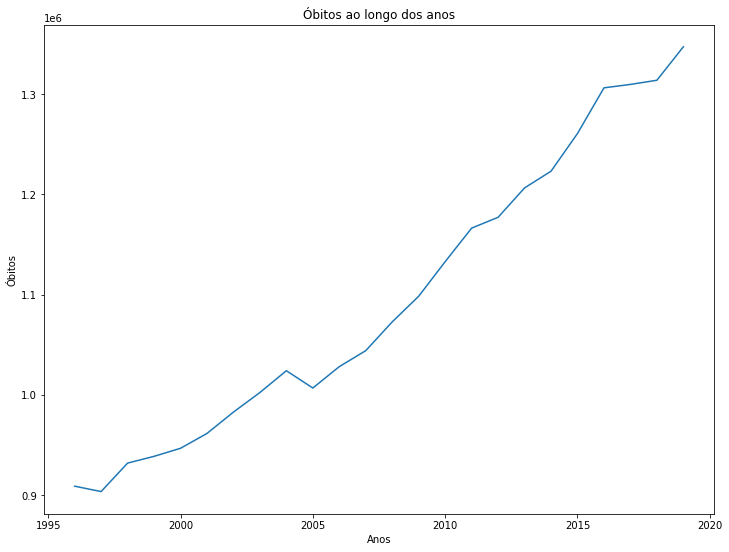

In [19]:
plt.figure(figsize=(12,9))

plt.plot(mortes_por_ano['ano'], mortes_por_ano['numero_obitos'])
plt.xlabel("Anos")  
plt.ylabel("Óbitos")  
plt.title("Óbitos ao longo dos anos")
plt.show()  

## Quantidade de óbitos por estado

In [20]:
obito_por_uf = df_copy[['numero_obitos', 'sigla_uf']].groupby('sigla_uf').sum().sort_values('numero_obitos', ascending=False)

In [21]:
obito_por_uf

,numero_obitos
sigla_uf,
SP,6204047
RJ,2952156
MG,2754206
RS,1823517
BA,1721234
PR,1520595
PE,1332556
CE,1052502
SC,794739


## Quantidade de óbitos por raça

In [22]:
obito_por_raca = df_copy.groupby('raca_cor').numero_obitos.sum().sort_values(ascending=False)

In [23]:
obito_por_raca

raca_cor
Branca      12936835
Parda        7775596
Preta        1791614
Amarela       186721
Indigena       65950
9.0                4
0.0                2
Name: numero_obitos, dtype: int64

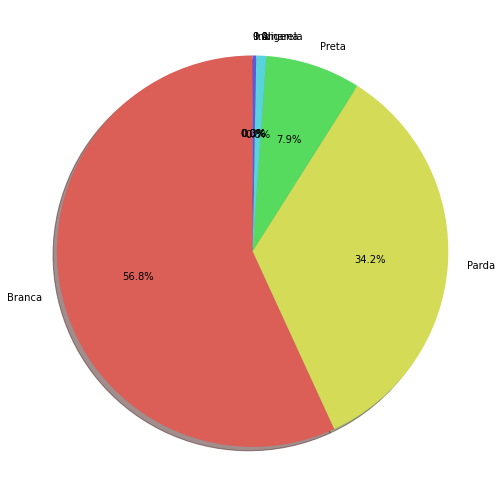

In [24]:
labels=obito_por_raca.index
sizes=obito_por_raca.values
plt.figure(figsize=(12,9))
colors=sns.color_palette('hls')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

## Quantidade de óbitos por sexo

In [25]:
obito_por_sexo = df_copy.groupby('sexo').numero_obitos.sum().sort_values(ascending=False).reset_index()
obito_por_sexo.drop([2, 3], inplace =True)

In [26]:
obito_por_sexo

,sexo,numero_obitos
0,Masculino,15024234
1,Feminino,11254186


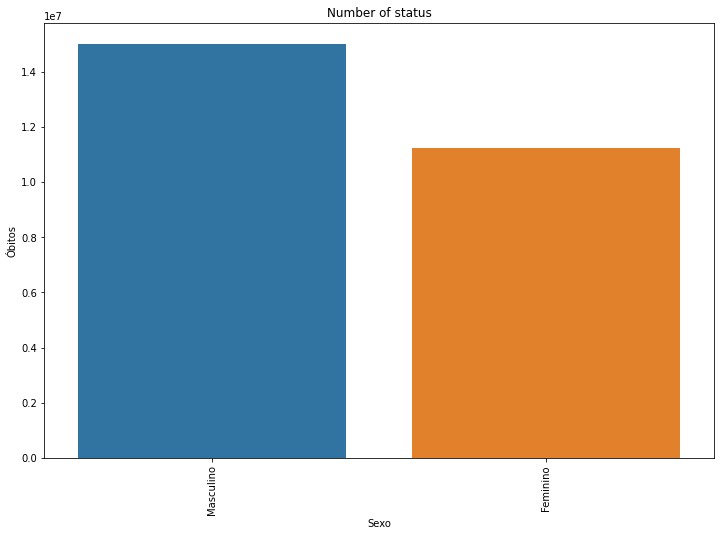

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x=obito_por_sexo.sexo, y=obito_por_sexo.numero_obitos)
plt.title('Number of status')
plt.xlabel('Sexo')
plt.ylabel('Óbitos')
plt.xticks(rotation=90)
plt.show()

## Quantidade de óbitos por idade

In [28]:
obito_por_idade = df_copy.groupby('idade').numero_obitos.sum().sort_values(ascending=False).reset_index()

In [29]:
obito_por_idade

,idade,numero_obitos
0,0.0,1141129
1,78.0,547085
2,79.0,545403
3,77.0,544938
4,76.0,542086
...,...,...
126,126.0,5
127,127.0,5
128,128.0,1
129,129.0,1


In [30]:
obito_por_idade['idade'].describe()

count    131.000000
mean      65.022901
std       38.000904
min        0.000000
25%       32.500000
50%       65.000000
75%       97.500000
max      133.000000
Name: idade, dtype: float64

In [31]:
obito_por_idade['idade'].median()

65.0

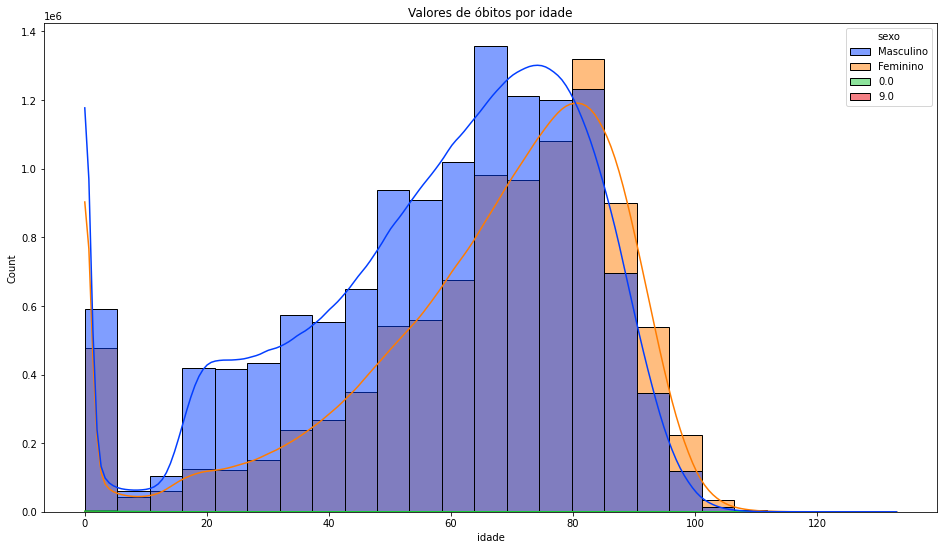

In [32]:
fig, ax1 = plt.subplots(figsize=(16, 9))
sns.set_palette('bright')
sns.histplot(data = df_copy[['idade', 'sexo', 'numero_obitos']], x='idade', ax=ax1, bins=25, hue='sexo', kde=True)
plt.title('Valores de óbitos por idade')
plt.show()

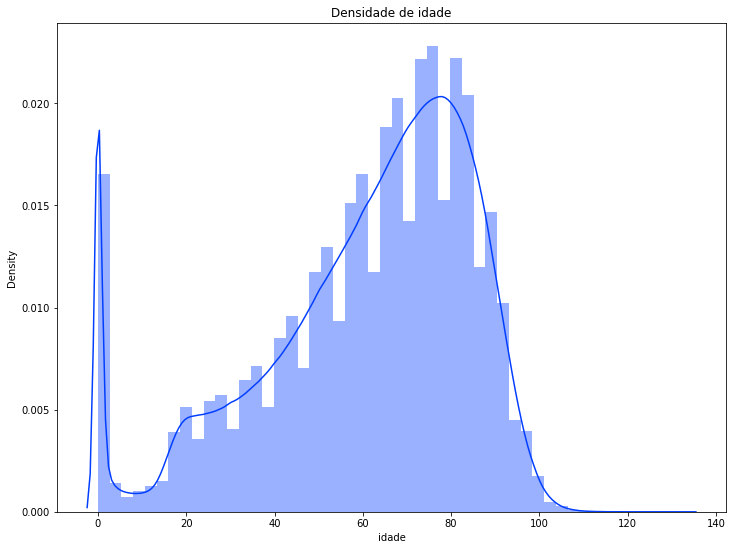

In [33]:
plt.figure(figsize=(12,9))
sns.distplot(df_copy['idade'])
plt.title('Densidade de idade')
plt.show()

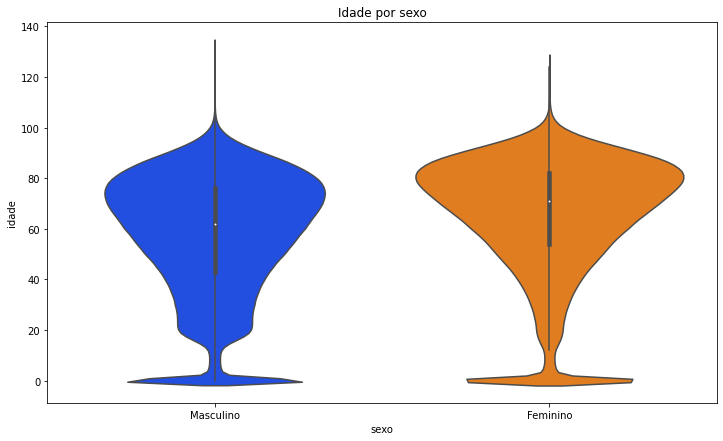

In [34]:
plt.figure(figsize=(12,7))
sns.set_palette('bright')
sns.violinplot(x=df_copy.loc[(df_copy['sexo'] != 0.0) & (df_copy['sexo'] != 9.0 )]['sexo'],y=df_copy['idade'])
plt.title('Idade por sexo')
plt.show()

## Quantidade de óbitos por estado

In [35]:
df_copy = df_copy[df_copy.duplicated('causa_basica', keep=False)] # seleciona nomes que aparecem mais de uma vez

total_por_estado = df_copy.groupby('sigla_uf').numero_obitos.sum() # agrupa o total por estado
df_copy = df_copy.merge(total_por_estado, on='sigla_uf', suffixes=('', '_total_por_estado')) # une os dados com total por estado

df_copy['freq_per_100k'] = 100_000 * df_copy.numero_obitos / df_copy.numero_obitos_total_por_estado # cria o total por estado por 100k pessoas

In [36]:
state2abbr = {
    'AC': 'BR.AC', 'AL': 'BR.AL', 'AP': 'BR.AP',
    'AM': 'BR.AM', 'BA': 'BR.BA', 'CE': 'BR.CE',
    'DF': 'BR.DF', 'ES': 'BR.ES',
    'GO': 'BR.GO', 'MA': 'BR.MA', 'MT': 'BR.MT',
    'MS': 'BR.MS', 'MG': 'BR.MG',
    'PA': 'BR.PA', 'PB': 'BR.PB', 'PR': 'BR.PR',
    'PE': 'BR.PE', 'PI': 'BR.PI', 'RJ': 'BR.RJ',
    'RN': 'BR.RN', 'RS': 'BR.RS',
    'RO': 'BR.RO', 'RR': 'BR.RR', 'SC': 'BR.SC',
    'SP': 'BR.SP', 'SE': 'BR.SE', 'TO': 'BR.TO',
}

In [37]:
def visualizar_texto(df, texto):
    texto_df = df.query(f'causa_basica == "{texto}"') # filtra o nome escolhido
    texto_df = texto_df.groupby('sigla_uf', as_index=False).sum() # agrupa pelos estados
    texto_df.sigla_uf = texto_df.sigla_uf.apply(lambda x: state2abbr[x]) # abrevia os estados
    texto_df = texto_df.rename(columns={'sigla_uf': 'HASC_1'}) # renomeia a coluna

    fig, ax = plt.subplots(1, 1)
    br_mapa = gpd.read_file('./arquivos/gadm36_BRA_1.shp') # lê o mapa
    br_mapa = br_mapa.merge(texto_df, on='HASC_1', how='outer') # une o mapa com os dados
    br_mapa.plot(column='freq_per_100k', ax=ax, legend=True) # desenha o gráfico

### Top 10 causas de morte (Classificação Estatística Internacional - CID) no Brasil

In [38]:
df_copy[['causa_basica', 'numero_obitos']].groupby('causa_basica').sum().sort_values('numero_obitos', ascending=False).head(10)

,numero_obitos
causa_basica,
I219,1752847
R98,1048603
I64,1028021
R99,901727
J189,735421
E149,563627
J449,477645
C349,472431
I10,417582


### Infarto agudo do miocárdio não especificado

Infartos agudos do miocárdio lidera em quantidade de óbitos no Brasil. Podemos observar uma alta principalmente no Mato Grosso do Sul e regiões mais desenvolvidas (região Sudeste e Sul).

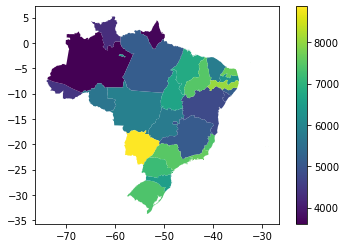

In [39]:
visualizar_texto(df_copy, 'I219')

### Morte sem assitência

Em segundo lugar temos mortes sem assistêcia, que teve alta em regiôes com menos recursos como o Nordeste e Norte.

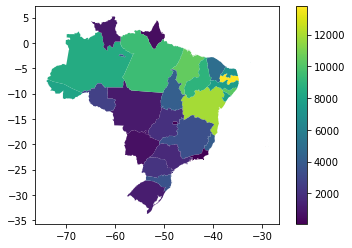

In [40]:
visualizar_texto(df_copy, 'R98')

### Acidente Vascular Cerebral, Não Especificado Como Hemorrágico ou Isquêmico

Acidente Vascular Cerebral (AVC), teve alta em mortes no Maranhão. Importante observar estados próximos da região norte como Pará, Tocantins e alguns estados da região do Nordeste. 

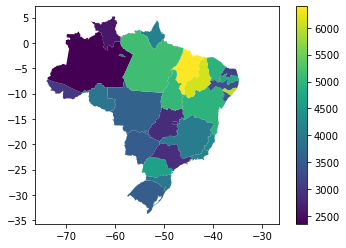

In [41]:
visualizar_texto(df_copy, 'I64')